# Signal Processing applied to a toy model of gravitational wave detection

In this note book we generate a toy model of grivitatonal wave signals and apply technqies from signal processing to extract the signals.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pywt as pywt

## a toy model of gravitaitonal waves
Here we write a fuction that has similar behavior to the first detected gravitational wave.  A description of this discovery and a plot of that signal can be found [here](https://en.wikipedia.org/wiki/List_of_gravitational_wave_observations).

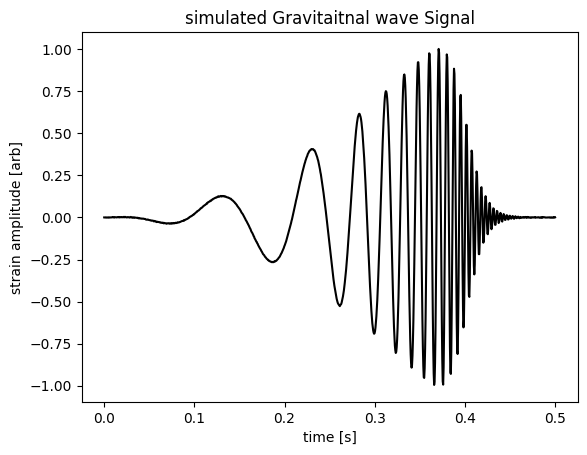

In [4]:
## set up a vector containing time
Nsamp = 1000
t, dt = np.linspace(0, 0.5, Nsamp, retstep=True)

## make a function to generate qualatative models of a gravitaitonal wave signal 

## the signal will have unit amplitude 
def make_fake_GW_sig(t,signal_to_noise_level, delay):
    sig = np.cos(( 100*(t+delay) + 4*((t+delay)/.25)**7)/2) #np.cos(2*np.pi*(50 + 10*t)*t)# + np.sin(40*np.pi*t)
    sig *= ((t+delay)**2) * (1-np.tanh(((t+delay)-.4)/.02)) /2
    sig /= np.max(sig)
    sig += np.random.randn(Nsamp)/signal_to_noise_level
    return(sig)


Sig = make_fake_GW_sig(t,1000,0)
plt.plot(t,Sig,"k")
plt.title("simulated Gravitaitnal wave Signal")
plt.ylabel("strain amplitude [arb]")
plt.xlabel("time [s]")
plt.show()

## simulating signals from three antennas

Here we simulate the signals seen in three observatories.  We vary the signal to noise and the phase delay to mimmic real data.   The signal to noise varies due to the antenna pattern of the three antennas and varying performance of the detector.  

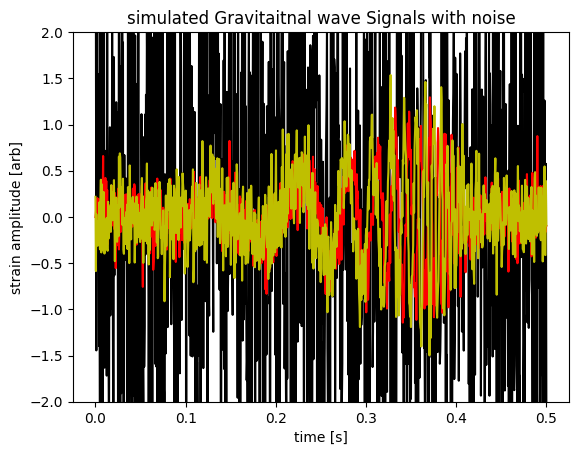

In [56]:
## make signals from three antennas

Ligo1 = make_fake_GW_sig(t,5,0)
Ligo2 = make_fake_GW_sig(t,3.5,.005)
Virgo = make_fake_GW_sig(t,.5,.01)


plt.plot(t,Virgo,"k")
plt.plot(t,Ligo1,"r")
plt.plot(t,Ligo2,"y")
plt.title("simulated Gravitaitnal wave Signals with noise")
plt.ylabel("strain amplitude [arb]")
plt.xlabel("time [s]")
plt.ylim(-2,2)
plt.show()


## Wavelet analysis

Here we use wavelet analysis to build a sonnogram of the signal.  I beleive the analysis of LIGO is carried out with a differnt technqiue, but this gets pretty close.

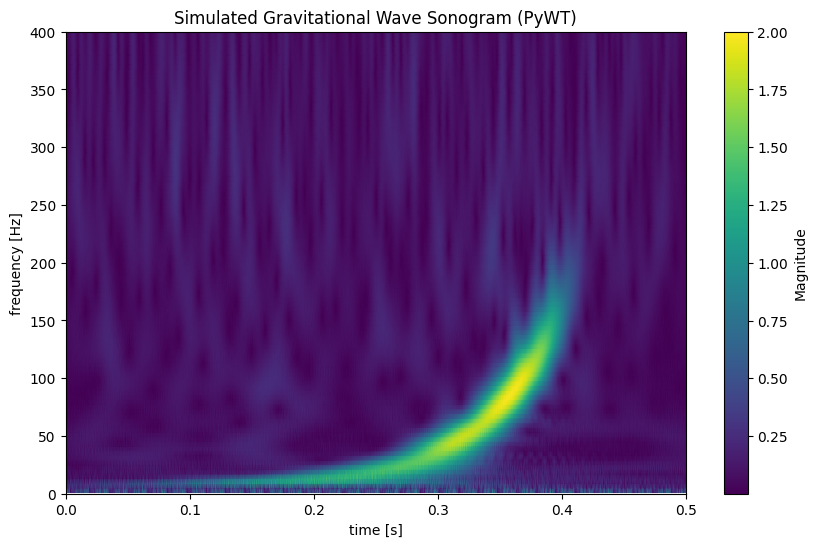

In [32]:
sig = Ligo1
fs = 1/dt
w = 3  # SciPy's w (omega0)
freqs = np.linspace(1, 400, 100) # Target frequencies in Hz

# 2. Convert Frequencies to PyWT Scales
# For 'cmor', the relationship is: scale = (center_freq * fs) / target_freq
# We use B=1.5 and C=1.0 as a standard high-resolution Morlet
center_freq = 1.0 
bandwidth = 1.5
wavelet = f'cmor{bandwidth}-{center_freq}'

scales = (center_freq * fs) / freqs

# 3. Perform the Continuous Wavelet Transform
# pywt.cwt returns (coefficients, frequencies)
cwtm, frequencies = pywt.cwt(sig, scales, wavelet, sampling_period=dt)

# 4. Visualization
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, freqs, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.title("Simulated Gravitational Wave Sonogram (PyWT)")
plt.ylabel("frequency [Hz]")
plt.xlabel("time [s]")
plt.ylim(0, 400)
plt.colorbar(label="Magnitude")
plt.show()

## Exrecise
compute the correlation between the three signals as a funciton of time lag.  Estimate the signal to noise of the cross correlation and find the delays between each antenna at which this peak occurs.  Is it possible to use cross-crrelations to detect the signal in the Virgo antenna?    

In [ ]:
## your code here, 

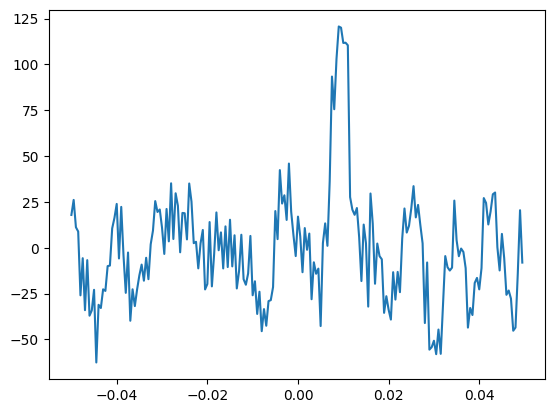

## Excercise

Estimate the Signal to Noise in the Sonnogram.   Write down how you could quantify this.   How could you confrim your intrepreation.   Once you have written this down, make Estimate the S/N of the signals seen in each sonnogram.

## Exrcrecise

###compute the sonogram of a brid song

Go to the New zeland departmnet of [conservation website](https://www.doc.govt.nz/nature/native-animals/birds/bird-songs-and-calls/) or for an easier to read wav file [here](https://soundcamp.org/soundscapes/birdsong-in-woodland-wav) and download the bird song of your choice.  Read it in using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html) for wave, of for  MP3 use pydub (pip install pydub).  Note: the wave is easier, but the NZ birds are more fun).

Once you have that read in, compute the sonnogram for that bird call

